## NTMC Assignment


- Harshal Deshpande - BT18CSE079
- Prachi Kalantri - BT18CSE136
- Ajinkya Jadhav - BT18CSE145


## Computation circuit 

In [1]:
import numpy as np
import random

from qiskit import *
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

In [2]:
# Total number of wires 
N = 8

In [3]:
comp_circuit = QuantumCircuit(N)
operations = []

In [4]:
comp_circuit.h(0)
operations.append(('0', 'H'))

In [5]:
comp_circuit.cx(0, 1)
operations.append(('01', 'LCNOT'))

In [6]:
comp_circuit.y(1)

In [7]:
comp_circuit.p(180, 6)
operations.append(('6', 'P'))

In [8]:
comp_circuit.y(6)

In [9]:
comp_circuit.z(7)

In [10]:
comp_circuit.r(180, 90, 0)
operations.append(('0', 'R'))

In [11]:
comp_circuit.h(1)
comp_circuit.cx(1, 2)
comp_circuit.h(6)
comp_circuit.cx(6, 5)
comp_circuit.cx(3, 4)
operations.append(('12', 'NLCNOT'))

In [12]:
comp_circuit.draw()

┌───┐        ┌───────────┐          
q_0: ──┤ H ├─────■──┤ R(180,90) ├──────────
       └───┘   ┌─┴─┐└───┬───┬───┘┌───┐     
q_1: ──────────┤ X ├────┤ Y ├────┤ H ├──■──
               └───┘    └───┘    └───┘┌─┴─┐
q_2: ─────────────────────────────────┤ X ├
                                      └───┘
q_3: ────■─────────────────────────────────
       ┌─┴─┐                               
q_4: ──┤ X ├───────────────────────────────
       └───┘                     ┌───┐     
q_5: ────────────────────────────┤ X ├─────
     ┌────────┐┌───┐    ┌───┐    └─┬─┘     
q_6: ┤ P(180) ├┤ Y ├────┤ H ├──────■───────
     └─┬───┬──┘└───┘    └───┘              
q_7: ──┤ Z ├───────────────────────────────
       └───┘

In [13]:
computation_circuit = comp_circuit.to_gate()

In [14]:
print(operations)
type(computation_circuit)

[('0', 'H'), ('01', 'LCNOT'), ('6', 'P'), ('0', 'R'), ('12', 'NLCNOT')]


qiskit.circuit.gate.Gate

## Initialization

In [15]:
# Both entities agree upon the computation circuit
circuit = QuantumCircuit(N, N)
circuit.append(computation_circuit, [0, 1, 2, 3, 4, 5, 6, 7])
circuit.draw()

┌────────────┐
q_0: ┤0           ├
     │            │
q_1: ┤1           ├
     │            │
q_2: ┤2           ├
     │            │
q_3: ┤3           ├
     │  circuit-2 │
q_4: ┤4           ├
     │            │
q_5: ┤5           ├
     │            │
q_6: ┤6           ├
     │            │
q_7: ┤7           ├
     └────────────┘
c: 8/══════════════

In [16]:
# For all wires w ∈ A∪B, set their initial encryption keys as (0, 0)
xa = [0] * N
za = [0] * N
xb = [0] * N
zb = [0] * N

In [17]:
# For all wires w ∈ A∪B, set their initial encryption keys as (0, 0)

# Actula values
# xa = [0] * N
# za = [0] * N
# xb = [0] * N
# zb = [0] * N

# For testing 
# xa = [1, 0, 0 , 0] 
# za = [0, 0, 0, 0]
# xb = [0, 0, 0, 1]
# zb = [0, 0, 1, 0]

# print(xa, za, xb, zb)

## Update keys and add decryption circuit

In [18]:
for wire, op in operations:
    if(op == 'H'):
        wire = int(wire)
        
        temp = xa[wire]
        xa[wire] = za[wire]
        za[wire] = temp
        
        temp = xb[wire]
        xb[wire] = zb[wire]
        zb[wire] = temp
        
    elif(op == 'P'):
        wire = int(wire)
        
        za[wire] = xa[wire] ^ za[wire]
        zb[wire] = xb[wire] ^ zb[wire]
            
    elif(op == 'LCNOT'):
        c = int(wire[0])
        t = int(wire[1])
        if(c < N/2):
            za[c] = za[c] ^ za[t]
            xa[t] = xa[t] ^ xa[c]
        else:
            zb[c] = zb[c] ^ zb[t]
            xb[t] = xb[t] ^ xb[c]
               
    elif(op == 'R'):
        wire = int(wire)

        # 
        r = random.choice([0, 1])
        r_dash = random.choice([0, 1])
        s = random.choice([0, 1])
        s_dash = random.choice([0, 1])
        alpha = random.choice([0, 1])    
        beta = alpha ^ ((r^xa[wire]) & xb[wire])
        
        # key updation
        za[wire] = r_dash ^ alpha ^ za[wire] ^ xa[wire]
        xa[wire] = xa[wire]^ r
        
        zb[wire] = s_dash ^ beta ^ zb[wire] ^ xb[wire]
        xb[wire] = xb[wire]^ s
        
    elif(op == 'NLCNOT'):
        c = int(wire[0])
        t = int(wire[1])
        

In [19]:
print(xa, za, xb, zb)

[0, 0, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0] [1, 0, 0, 0, 0, 0, 0, 0]


In [20]:
decrypt_circuit = QuantumCircuit(N)

for i in range(0, N):
    x = xa[i] ^ xb[i]
    z = za[i] ^ zb[i]

    if(x == 1 and z == 0):
        decrypt_circuit.x(i)
    elif(x == 0 and z == 1):
        decrypt_circuit.z(i)
    elif(x == 1 and z == 1):
        decrypt_circuit.y(i)

In [21]:
decrypt_circuit.draw()

┌───┐
q_0: ┤ X ├
     └───┘
q_1: ─────
          
q_2: ─────
          
q_3: ─────
          
q_4: ─────
          
q_5: ─────
          
q_6: ─────
          
q_7: ─────

In [22]:
decryption_circuit = decrypt_circuit.to_gate()

In [23]:
circuit.append(decryption_circuit, [0,1,2,3,4,5,6,7])

In [24]:
circuit.draw()

┌────────────┐┌────────────┐
q_0: ┤0           ├┤0           ├
     │            ││            │
q_1: ┤1           ├┤1           ├
     │            ││            │
q_2: ┤2           ├┤2           ├
     │            ││            │
q_3: ┤3           ├┤3           ├
     │  circuit-2 ││  circuit-6 │
q_4: ┤4           ├┤4           ├
     │            ││            │
q_5: ┤5           ├┤5           ├
     │            ││            │
q_6: ┤6           ├┤6           ├
     │            ││            │
q_7: ┤7           ├┤7           ├
     └────────────┘└────────────┘
c: 8/════════════════════════════

## Execute final circuit

In [25]:
circuit.measure([0,1,6,7], [0,1,6,7])
circuit.draw()

┌────────────┐┌────────────┐┌─┐         
q_0: ┤0           ├┤0           ├┤M├─────────
     │            ││            │└╥┘┌─┐      
q_1: ┤1           ├┤1           ├─╫─┤M├──────
     │            ││            │ ║ └╥┘      
q_2: ┤2           ├┤2           ├─╫──╫───────
     │            ││            │ ║  ║       
q_3: ┤3           ├┤3           ├─╫──╫───────
     │  circuit-2 ││  circuit-6 │ ║  ║       
q_4: ┤4           ├┤4           ├─╫──╫───────
     │            ││            │ ║  ║       
q_5: ┤5           ├┤5           ├─╫──╫───────
     │            ││            │ ║  ║ ┌─┐   
q_6: ┤6           ├┤6           ├─╫──╫─┤M├───
     │            ││            │ ║  ║ └╥┘┌─┐
q_7: ┤7           ├┤7           ├─╫──╫──╫─┤M├
     └────────────┘└────────────┘ ║  ║  ║ └╥┘
c: 8/═════════════════════════════╩══╩══╩══╩═
                                  0  1  6  7

In [26]:
simulator = QasmSimulator()
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()
counts = result.get_counts(circuit)
print(counts)

{'00000001': 30, '01000011': 203, '00000011': 234, '00000000': 232, '01000000': 212, '01000010': 37, '01000001': 35, '00000010': 41}


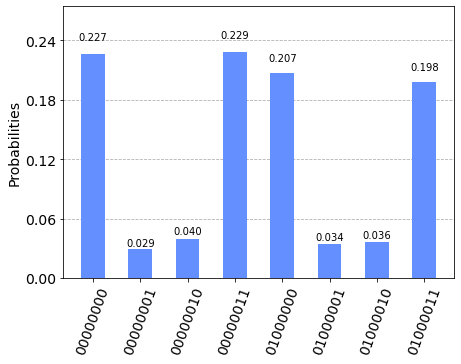

In [27]:
plot_histogram(counts)